## Interaction Effects

### Overview
- Interaction effects occur when the effect of one variable depends on the value of another variable.
- In more complex study areas, the independent variables might interact with each other. 
- Interaction effects indicate that a third variable influences the relationship between an independent and dependent variable.
- This type of effect makes the model more complex, but if the real world behaves this way, it is critical to incorporate it in your model.
- For example, the relationship between condiments and enjoyment probably depends on the type of food.

### Example with Categorical Independent Variables
- We can think of interaction effects as an "it depends" effect.
- Consider the example below for understanding interaction effects.
    - Imagine that we are conducting a taste test to determine which food condiment produces the highest enjoyment.
    - We'll perform a regression analysis where our dependent variable is Enjoyment. The  two independent variables are both categorical variables. Food and Condiment
    - The model with the interaction term is: Satisfaction = Food + Condiment + Food * Condiment
    - The Food * Condiment is the interaction term in the model.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
# Load the dataset
food_interaction_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/Interactions_Categorical.csv")
food_interaction_df.head()

,Enjoyment,Food,Condiment
0,81.926957,Hot Dog,Mustard
1,84.939774,Hot Dog,Mustard
2,90.286479,Hot Dog,Mustard
3,89.561802,Hot Dog,Mustard
4,97.676826,Hot Dog,Mustard


**NOTE**
- A : B represents only the interaction of two variables as in the below equation
- A * B can be used as a shorthand for the complete equation as it represents A + B + A : B
- For more details refer - https://stackoverflow.com/questions/33050104/difference-between-the-interaction-and-term-for-formulas-in-statsmodels-ols
- https://stats.stackexchange.com/questions/27724/do-all-interactions-terms-need-their-individual-terms-in-regression-model

In [3]:
# Fit the model
food_interaction_model = ols("Enjoyment ~ C(Food) + C(Condiment) + C(Food):C(Condiment)", data=food_interaction_df).fit()
food_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Enjoyment   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     212.4
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           7.41e-37
Time:                        07:03:27   Log-Likelihood:                -240.33
No. Observations:                  80   AIC:                             488.7
Df Residuals:                      76   BIC:                             498.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       65.3166      1.120     58.343      0.000      63.087      67.546
C(Food)[T.Ice Cream]                            27.7315      1.583     17.515      0.000      24.578      30.885
C(Condiment)[T.Mustard]                         24.2891      1.583     15.341      0.000      21.136      27.442
C(Food)[T.Ice Cream]:C(Condiment)[T.Mustard]   -56.0283      2.239    -25.023      0.000     -60.488     -51.569
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                2.035
Skew:                           0.325   Prob(JB):                        0.362
Kurtosis:                       2.566   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# ANOVA Result
anova_result = sm.stats.anova_lm(food_interaction_model, typ=2)
anova_result

,sum_sq,df,F,PR(>F)
C(Food),1.597762,1.0,0.063740,8.013618e-01
C(Condiment),277.520500,1.0,11.071120,1.353292e-03
C(Food):C(Condiment),15695.828459,1.0,626.153372,1.953476e-38
Residual,1905.097085,76.0,NaN,NaN


### Interpretation of Interaction Effects
- Enjoyment is the dependent variable while Food and Condiments are the independent variables. 
- The p-values in the output tell us that the interaction effect (Food * Condiment) is statistically significant.
- Consequently, we know that the satisfaction you derive from the condiment depends on the type of food.
- In other words, the relationship between Condiment and Enjoyment changes based on the value of Food.
- Statistically it is also valid to state that the relationship between Food and Enjoyment changes based on the value of Condiment.

#### Interaction Plots
- The best way to understand these effects is with a special type of graph - an interaction plot.
- This type of plot displays the fitted values of the dependent variable on the y-axis while the x-axis shows the value of first independent variable.
- Meanwhile, the various lines represent values of the second independent variable.
- On an interaction plot, parallel lines indicate that there is no interaction effect while different slopes suggest that one might be present.

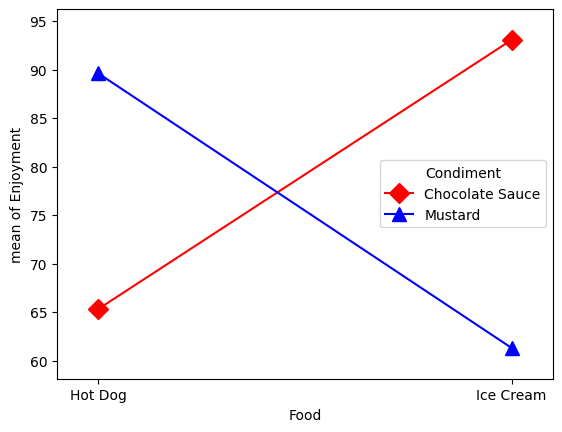

In [5]:
fig = interaction_plot(
    x=food_interaction_df["Food"],
    trace=food_interaction_df["Condiment"],
    response=food_interaction_df["Enjoyment"],
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10)

- The crossed lines on the graph suggest that there is an interaction effect, which is confirmed by the significant p-value for the Food * Condiment term.
- The graph shows that the enjoyment levels are high for chocolate sauce when the food is ice cream.
- Conversely the satisfaction levels are high for mustard when the food is hot dog.

#### Consequences of overlooking Interaction Effects
- When we have statistically significant interaction effects, we can't consider the main effects without considering the interactions.
- In the previous question we can't answer which condiment is better without knowing the type of food. "It depends"
- Suppose we want to maximize the satisfaction by choosing the best food and the best condiment. However if we don't include the interaction effect and assess it only on main effects, we'd choose hot dogs with chocolate sauce, because they each produce higher enjoyment which is not a good choice.
- When we have statistically significant interactions, we cannot interpret the main effects without considering the interaction effects.

### Interaction Effect with Continuous Independent Variables
- In this example we will assess continuous independent variables in a regression model for a manufacturing process.
- The independent variables (processing time, temperature and pressure) affect the dependent variable (product strength).
- In the regression model we will include temperature * pressure as an interaction effect.

**Tip**
- If you include an interaction term in your model for continuous variables, you should center these variables to reduce multicolinearity that it produces.

In [6]:
# load the dataset
product_strength_df = pd.read_csv("../../datasets/RegressionAnalysisDatasets/Interactions_Continuous.csv")
product_strength_df.head()
# product_strength_df["Pressure"].min()
# product_strength_df["Pressure"].max()

,Strength,Temperature,Pressure,Time
0,100.666667,100.59,81.10,33.32
1,97.777778,109.50,72.38,32.92
2,88.444444,103.98,74.62,35.32
3,85.444444,99.39,65.04,35.00
4,93.185185,107.25,67.42,32.80


In [7]:
# Fit the model
product_strength_model = ols("Strength ~ Temperature + Pressure + Time + Temperature:Pressure", data=product_strength_df).fit()
product_strength_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     57.13
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           6.45e-12
Time:                        07:03:28   Log-Likelihood:                -68.513
No. Observations:                  29   AIC:                             147.0
Df Residuals:                      24   BIC:                             153.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1064.4604    330.583      3.220      0.004     382.170    1746.751
Temperature             -8.5382      3.157     -2.704      0.012     -15.054      -2.022
Pressure               -11.5152      4.483     -2.569      0.017     -20.768      -2.262
Time                    -4.7739      0.326    -14.655      0.000      -5.446      -4.102
Temperature:Pressure     0.1210      0.043      2.790      0.010       0.031       0.211
==============================================================================
Omnibus:                        0.113   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.028
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       2.862   Cond. No.                     4.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# ANOVA Result
anova_result_continuous = sm.stats.anova_lm(product_strength_model, typ=2)
anova_result_continuous

,sum_sq,df,F,PR(>F)
Temperature,31.038207,1.0,3.891482,6.015797e-02
Pressure,309.336994,1.0,38.783789,1.951872e-06
Time,1712.888562,1.0,214.757075,1.801057e-13
Temperature:Pressure,62.083935,1.0,7.783906,1.016317e-02
Residual,191.422451,24.0,NaN,NaN


- The Output indicates that the interaction term is statistically significant. But to interpret it we can use interaction plots.
- The interaction plot is mainly plotted for categorical variables and cannot be plotted directly for continuous variables.
- The method used here we will create a function in which it will select high and low value for "Pressure", and enters them into the regression equation with a range of values for "Temperature".

In [73]:
temp_coeff = product_strength_model.params["Temperature"]
pressure_coeff = product_strength_model.params["Pressure"]
time_coeff = product_strength_model.params["Time"]
interact_coeff = product_strength_model.params["Temperature:Pressure"]
c = product_strength_model.params["Intercept"]
max_pressure = product_strength_df["Pressure"].max()
min_pressure = product_strength_df["Pressure"].min()

# We will create 2 dataframes, one for min pressure and one for max pressure
# For min pressure
min_pressure_df = pd.DataFrame(data={"temperature": product_strength_df["Temperature"], "time": product_strength_df["Time"]})
min_pressure_df["min_max_pressure"] = min_pressure
min_pressure_df["Strength"] = min_pressure_df.apply(lambda row: temp_coeff * row[0] + pressure_coeff * min_pressure + time_coeff * row[1] + interact_coeff * (row[0]*min_pressure) + c, axis=1 )
# interact_coeff * row[0] * min_pressure
# For max pressure
# + interact_coeff * row[0] * max_pressure
max_pressure_df = pd.DataFrame(data={"temperature": product_strength_df["Temperature"]})
max_pressure_df["min_max_pressure"] = max_pressure
max_pressure_df["Strength"] = max_pressure_df.apply(lambda row: temp_coeff * row[0] + pressure_coeff * max_pressure + time_coeff * row[1] + interact_coeff * (row[0]*max_pressure) + c, axis=1)
max_pressure_df["Strength"] = max_pressure_df["Strength"].abs

In [74]:
# max_pressure_df

In [71]:
# NOTE: Will try this later
# Concatenate both dataframes
# interaction_pressure_df = pd.concat([min_pressure_df, max_pressure_df])
# interaction_pressure_df.rename(columns={"min_max_pressure": "pressure"}, inplace=True)

#plot the interaction plot
# fig = interaction_plot(
#     x=interaction_pressure_df["temperature"],
#     trace=interaction_pressure_df["pressure"],
#     response=interaction_pressure_df["Strength"],
#     colors=["red", "blue"],
#     markers=["D", "^"],
#     ms=10)
# plt.plot(min_pressure_df["temperature"], min_pressure_df["Strength"], color="red")
# plt.plot(max_pressure_df["temperature"], max_pressure_df["Strength"], color="blue")


### Important Considerations for Interaction Effects
- While the plots can help to interpret the interaction effects, use a hypothesis test to determine whether the effect is statistically significant.
- Plots can display non-parallel lines that represent random sample error rather than an actual effect.
- p-values and hypothesis tests help sort out the real effects from the noise.
- The examples above are 2 way interactions because there are 2 independent variables in each term (Food * Condiment) and (Temperature * Pressure)
- It's equally valid to interpret these effects in two ways.
- For ex : the relationship between
    - Satisfaction and Condiment depends on Food.
    - Satisfaction and Food depends on Condiment.
- You can have higher order interactions, for ex: a three way interaction has 3 variables in the term, such as Food*Condiment*X.
- In this case, the relationship between Satisfaction and Condiment depends on both Food and X. However this type of effect is challenging to interpret.
- When you have interaction effects that are statistically significant, do not attempt to interpret the main effects without considering the interaction effects or you will draw the wrong conclusions. 

### Interaction Effects v/s Correlation between Independent Variables.
- A common misconception is that interaction effect indicates that the independent variables themselves are correlated which is not necessarily true.
- An interaction effect refers to relationship between each independent variable and the dependent variable.
- Specifically an interaction effect indicates that the relationship between an independent variable and the dependent variable changes based on the value of at least one other independent variable. 
- Those independent variables don't need to be correlated for that effect to occur.
- Correlated independent variables is another phenomenon which is called multicolinearity.

### Combinations of Main Effects and Interaction effects.
- A common issue is interpreting significant interaction effects when the main effects are not significant.
- How do you interpret the possible combinations of significant/insignificant main effects and significant/insignificant interaction effects?
- To understand the answer first we need to go through the definitions of each type of effects:
    - **Main Effect** - The portion of an independent variable's effect on the dependent variable's effect that does not depend on the values of other variables in the model.
    - **Interaction Effect** - The portion of an independent variable's effect that does depend on the value of at least one other independent variable in the model.
- The total effect of an independent variable = main effect + interaction effect
- When either type of effect is not statistically significant, you have insufficient evidence to conclude that the effect is different from zero.
- When an effect is not significant, you can zero it out of the above equation.
- Below are the possible combinations for main effects and interaction effects. In the example we will use A and B as main effects and A*B as interaction effect.

#### Main Effects are significant, but the interaction effects are not significant
- In this model, the total effect of A and the total effect of B are contained in the main effects only because the interaction effect is not significant.
- In other words A's effect is due to the value of A and not influenced by B at all. Conversely, all of B's effects is dur to the value of B and not influenced by A at all.

#### Main effects are significant and the interaction effect is significant
- In this model, the total effect for A and the total effect for B include both main effects and interaction effects.
- In other words a portion of A's effect does not depend on the value of B, while another portion of A's effect does depend on B.
- We need to sum the main effect and interaction effect to understand the total effect for either independent variable.
- The total effect of A = A + A*B and B = B + A*B

#### Only the interaction effect is significant.
- In this model , the total effect of A and total effect of B both entirely depend on the value of the other variable.
- The total effect for either variable will be A * B
- The general rule is to include independent variables as main effects in the model, regardless of their significance, when a statistically significant term contains those variables.
- This allows the model to estimate the interaction effect better. So if A*B is statistically significant, but A and/or B is not significant, include both A and B in the model regardless for their statistical significance.

### Interpreting the Coefficient for the Interaction Term
- The coefficient sign for an interaction term really doesn't mean much by itself as the effect of a 2 way interaction term is the product of 3 values - the values of the two variables in the interaction and the coefficient of the interaction term.
- Depending on the combination of positive and negative values, a negative coefficient can represent a positive effect (if the product of variable values is -ve).
- Also while the interaction effect might have a -ve sign, the total effect of main effect and interaction effect might be +ve.
- The interaction effect might make it a little less +ve than it would have been.

### Hypothesis for the Interaction Term
- The hypothesis for the interaction term are the following:  
    **Null** - The slopes of different lines are equal.  
    **Alternative** - The slopes of the lines are not equal.
- When we have a significant interaction term, we reject the null hypothesis. If we have sufficient evidence to conclude that the slope of the lines are not equal, the lines must cross at some point.
- However that point might not fall within the range of your data that the interaction plot represents.
- Whether you are assessing differences between means or interaction effects, you might see patterns in your data that are just flukes based on the luck of the draw rather than representing real relationship.
- Hypothesis test play a critical role in separating the signal (real effects in the population) from the noise (random sampling error).
- This protective function helps prevent mistaking random error for a real effect.
- On Interaction plots, random error in the sample can produce lines that appear to have different slopes.
- However if the interaction term is not statistically significant, the sample provides insufficient evidence for concluding that it represents a real effect at the population level.
- In other words, this might be noise in the sample.